In [41]:
from utils import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [42]:
# Files
# df_asap, lines = load_res("2023-08-17-15:24:32_ev_world_ASAP")
l__fileexp = ["2023-08-17-15:24:32_ev_world_ASAP", 
              "2023-08-17-15:26:51_ev_world_No-V2G",
              "2023-08-30-18:33:29_ev_world_Optim",
              "2023-09-13-00:22:37_ev_world_Oracle_NoV2G",
              "2023-09-13-08:59:05_ev_world_Oracle",
              "2023-09-14-17:58:22_ev_world_Oracle",
              "2023-09-15-13:38:18_ev_world_Optim_eta1",
              "2023-09-15-13:38:36_ev_world_Oracle_eta1",
              "2023-10-10-20:18:07_ev_world_PPO-sep",
              "2023-10-12-18:18:56_ev_world_PPO-lay",
              "2023-10-26-13:51:16_ev_world_PPO-lay",
              "2023-10-26-18:59:09_ev_world_PPO-agg",
              "2023-10-30-15:46:38_ev_world_PPO-lay",
              "2023-10-30-19:11:03_ev_world_PPO-agg",
              "2023-10-30-19:31:40_ev_world_2023-10-30-19:11:03_PPO-agg",
              "2023-10-30-19:56:30_ev_world_2023-10-30-19:11:03_PPO-agg",
              "2023-10-30-20:14:47_ev_world_2023-10-30-19:56:30_2023-10-30-19:11:03_PPO-agg",
              "2023-10-30-21:23:29_ev_world_PPO-lay",
              "2023-10-30-23:30:15_ev_world_2023-10-30-21:23:29_PPO-lay",
              "2023-10-31-00:03:24_ev_world_2023-10-30-23:30:15_2023-10-30-21:23:29_PPO-lay",
              "2023-10-31-00:40:34_ev_world_PPO-lay",
              "2023-10-31-09:05:18_ev_world_2023-10-31-00:40:34_PPO-lay",
              "2023-10-31-09:45:35_ev_world_2023-10-31-09:05:18_2023-10-31-00:40:34_PPO-lay",
              "2023-10-31-11:15:04_ev_world_3_2023-10-31-00:40:34_PPO-lay",
              "2023-10-31-11:38:12_ev_world_2023-10-31-11:15:04_3_2023-10-31-00:40:34_PPO-lay",
              "2023-10-31-12:13:44_ev_world_2023-10-31-11:38:12_2023-10-31-11:15:04_3_2023-10-31-00:40:34_PPO-lay",
              "neg_rew_0",
              "neg_rew_1",
              "neg_rew_2",
              "lay_0",
              "lay_1",
              "lay_2",
              "lay_3",
              "lay_4",
              "lay_5",
              "lay_std_0",
              "lay_std_1",
              "lay_std_2",
              "a_agg_0",
              "a_agg_1",
              "a_agg_2",
              "a_agg_3",
              "a_agg_4",
              "a_agg_5",
              "a_agg_6",
              "a_agg_7",
              "a_agg_8",
              "a_agg_9",
              "a_agg_10",
              "a_agg_11",
              "lay_act_crit_0",
              "lay_act_crit_1",
              "lay_act_crit_2",
              "lay_act_crit_3",
              "lay_act_crit_4",
              "month_agg_nomini_det_inference_100",
              ]

l_exp = ["ASAP", "NoV2G", "Optim", "Oracle_NoV2G", "Oracle", "Oracle",
          "Optim_eta1", "Oracle_eta1", "RL_untrained_sep", "RL_untrained_lay",
            "lay2", "agg", "lay3", "agg_untrained", "agg_trained", "agg_trained",
              "agg_trained_2", "lay", "lay_trained", "lay_trained_2", "lay_norm_0", "lay_norm_1",
              "lay_norm_2", "lay_norm_3", "lay_norm_4", "lay_norm_5",
              "neg_rew_0", "neg_rew_1", "neg_rew_2", 
              "lay_0",
              "lay_1",
              "lay_2",
              "lay_3",
              "lay_4",
              "lay_5",
              "lay_std_0",
              "lay_std_1",
              "lay_std_2",
              "a_agg_0",
              "a_agg_1",
              "a_agg_2",
              "a_agg_3",
              "a_agg_4",
              "a_agg_5",
              "a_agg_6",
              "a_agg_7",
              "a_agg_8",
              "a_agg_9",
              "a_agg_10",
              "a_agg_11",
              "lay_act_crit_0",
              "lay_act_crit_1",
              "lay_act_crit_2",
              "lay_act_crit_3",
              "lay_act_crit_4",
              "month_agg_nomini_det_inference_100",
              ] 
sum_cols = ["exp", "transf", "client", "payoff"]

df_sum = summ_table(l_exp, l__fileexp)
df_sum.head(100)


,name,transf,client,payoff,total
0,ASAP,14240.008600,40033.958664,0.000000,25793.950064
1,NoV2G,7976.944281,40033.958664,0.000000,32057.014383
2,Optim,6704.185750,40033.958664,1535.107907,31794.665007
3,Oracle_NoV2G,7976.944277,40033.958664,1535.107907,30521.906480
4,Oracle,6704.185743,40033.958664,1535.107907,31794.665014
5,Oracle,6704.185743,40033.958664,1535.107907,31794.665014
6,Optim_eta1,6335.623991,40033.958664,1592.657412,32105.677260
7,Oracle_eta1,6335.623984,40033.958664,1592.657412,32105.677267
8,RL_untrained_sep,12866.025643,40033.958664,1535.107907,25632.825114
9,RL_untrained_lay,12737.157629,40033.958664,1535.107907,25761.693128


In [3]:
df_sum.to_csv("df_sum.csv", index=False )

In [4]:
l_exp_1 = [f"lay_act_crit_{i}" for i in range(25)]
l_exp_2 = [f"lay_act_crit_smalrwd_{i}" for i in range(12)]
l_exp_3 = [f"sep_{i}" for i in range(10)]
l_exp_4 = [f"lay_small_lr_{i}" for i in range(10)]
l_exp_5 = [f"lay_slr_numsteps_{i}" for i in range(10)]
l_exp = l_exp_1 + l_exp_2 + l_exp_3 + l_exp_4 + l_exp_5

sum_cols = ["exp", "transf", "client", "payoff"]

df_sum2 = summ_table(l_exp, l_exp)
df_sum2.to_csv("df_sum2.csv", index=False )
df_sum2.head(100)

,name,transf,client,payoff,total
0,lay_act_crit_0,12974.041929,40033.958664,1535.107907,25524.808828
1,lay_act_crit_1,13052.793587,40033.958664,1535.107907,25446.057170
2,lay_act_crit_2,13035.272239,40033.958664,1535.107907,25463.578518
3,lay_act_crit_3,13045.229031,40033.958664,1535.107907,25453.621726
4,lay_act_crit_4,13005.470259,40033.958664,1535.107907,25493.380498
5,lay_act_crit_5,13042.138882,40033.958664,1535.107907,25456.711875
6,lay_act_crit_6,13022.863539,40033.958664,1535.107907,25475.987218
7,lay_act_crit_7,12993.572631,40033.958664,1535.107907,25505.278126
8,lay_act_crit_8,12962.282774,40033.958664,1535.107907,25536.567983
9,lay_act_crit_9,12920.043677,40033.958664,1535.107907,25578.807080


## Daily reward


In [5]:
df_asap= pd.read_csv("../ExpLogs/2023-08-17-15:24:32_ev_world_ASAP.csv")
df_optim = pd.read_csv("../ExpLogs/2023-08-30-18:33:29_ev_world_Optim.csv")
df_lay_act_crit_15 = pd.read_csv("../ExpLogs/lay_act_crit_11.csv")

np_asap = df_asap["imbalance_bill"].values
np_optim = df_optim["imbalance_bill"].values
np_lay = df_lay_act_crit_15["imbalance_bill"].values
x = np.arange(len(np_optim))

kernel_size = 240*2
kernel = np.ones(kernel_size) / kernel_size
np_asap = np.convolve(np_asap, kernel, mode='same')
np_optim = np.convolve(np_optim, kernel, mode='same')
np_lay = np.convolve(np_lay, kernel, mode='same')

Text(0, 0.5, 'Imbalance (€)')

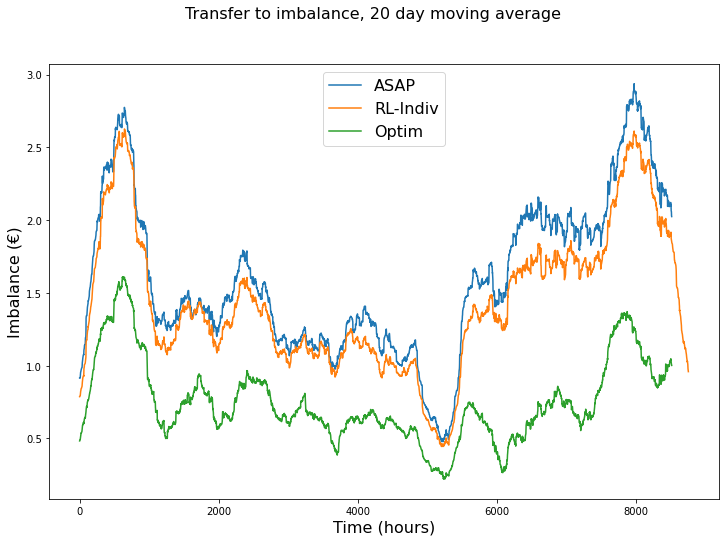

In [6]:
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(1,1,1)

ax1.plot(x, np_asap, label="ASAP")
ax1.plot(x, np_lay[:-1], label="RL-Indiv")
ax1.plot(x, np_optim, label="Optim")
ax1.legend(fontsize=16)
fig1.suptitle("Transfer to imbalance, 20 day moving average", fontsize=16)
ax1.set_xlabel("Time (hours)", fontsize=16)
ax1.set_ylabel("Imbalance (€)", fontsize=16)

## Monthly

In [48]:
sum_cols = ["exp", "transf", "client", "payoff"]

l_month_agg_crit =             [f"month/month_agg_crit_{i}" for i in range(30)]
l_month_agg_moresteps =        [f"month/month_agg_moresteps_{i}" for i in range(32)]
l_month_agg_nomini =           [f"month/month_agg_nomini_{i}" for i in range(99)]
l_month_agg_nomini_moresteps = [f"month/month_agg_nomini_moresteps_{i}" for i in range(50)]
l_month_ind_crit =             [f"month/month_ind_crit_{i}" for i in range(99)]
l_month_ind_moresteps =        [f"month/month_ind_moresteps_{i}" for i in range(99)]
l_month_ind_nomini =           [f"month/month_ind_nomini_{i}" for i in range(99)]
l_month_ind_nomini_moresteps = [f"month/month_ind_nomini_moresteps_{i}" for i in range(99)]
l_month_agg_nomini_det =       [f"month_agg_nomini_det_{i}" for i in range(73)]
l_month_agg_nomini_relu =      [f"month_agg_nomini_relu_{i}" for i in range(92)]

df_month_agg_crit = summ_table( l_month_agg_crit , l_month_agg_crit )
df_month_agg_moresteps  = summ_table( l_month_agg_moresteps , l_month_agg_moresteps )
df_month_agg_nomini = summ_table( l_month_agg_nomini , l_month_agg_nomini )
df_month_agg_nomini_moresteps  = summ_table( l_month_agg_nomini_moresteps , l_month_agg_nomini_moresteps )
df_month_ind_crit  = summ_table( l_month_ind_crit , l_month_ind_crit )
df_month_ind_moresteps  = summ_table( l_month_ind_moresteps , l_month_ind_moresteps )
df_month_ind_nomini  = summ_table( l_month_ind_nomini , l_month_ind_nomini )
df_month_ind_nomini_moresteps  = summ_table( l_month_ind_nomini_moresteps, l_month_ind_nomini_moresteps)
df_month_agg_nomini_det = summ_table( l_month_agg_nomini_det, l_month_agg_nomini_det)
df_month_agg_nomini_relu = summ_table( l_month_agg_nomini_relu, l_month_agg_nomini_relu)

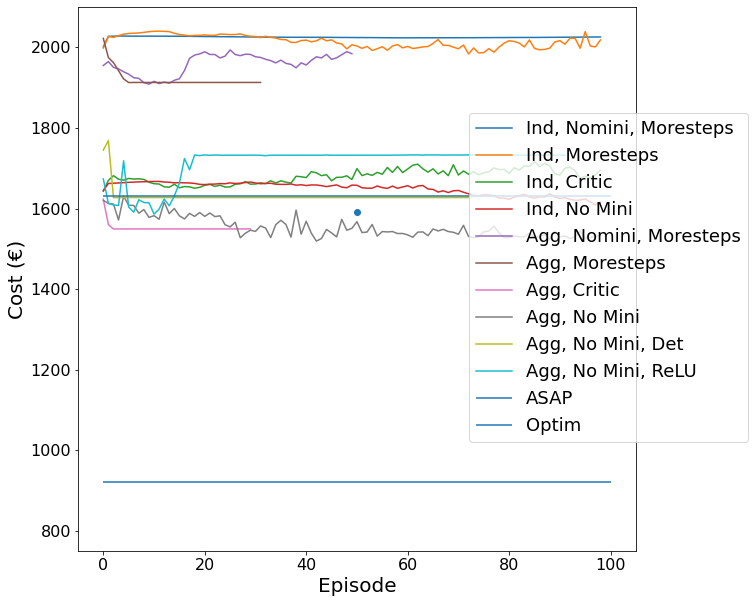

In [49]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(1,1,1)

fontsize = 20
ax1.plot(df_month_ind_nomini_moresteps["transf"], label="Ind, Nomini, Moresteps")
ax1.plot(df_month_ind_moresteps["transf"],        label="Ind, Moresteps")
ax1.plot(df_month_ind_crit["transf"],             label="Ind, Critic")
ax1.plot(df_month_ind_nomini["transf"],           label="Ind, No Mini")
ax1.plot(df_month_agg_nomini_moresteps["transf"], label="Agg, Nomini, Moresteps")
ax1.plot(df_month_agg_moresteps["transf"],        label="Agg, Moresteps")
ax1.plot(df_month_agg_crit["transf"],             label="Agg, Critic")
ax1.plot(df_month_agg_nomini["transf"],           label="Agg, No Mini")
ax1.plot(df_month_agg_nomini_det["transf"],       label="Agg, No Mini, Det")
ax1.plot(df_month_agg_nomini_relu["transf"],      label="Agg, No Mini, ReLU")
ax1.hlines(np_asap[:768].sum(),  0, 100,          label="ASAP")
ax1.hlines(np_optim[:768].sum(), 0, 100,          label="Optim")
ax1.scatter([50], [1592])
# Set fontsize of axis ticks
ax1.tick_params(axis='both', which='major', labelsize=fontsize-4)

ax1.set_xlabel("Episode", fontsize = fontsize)
ax1.set_ylabel("Cost (€)", fontsize = fontsize)
ax1.set_ylim([750, 2100])
ax1.legend(fontsize = fontsize-2, loc = (0.7,0.2))

## Observations
Moresteps is always worse
Agg sometimes plateaus, sometimes crashes sometimes both
The two that perform the best are nomini, agg is slightly better

In [9]:

df_month_ind_crit_0= pd.read_csv("../ExpLogs/month/month_ind_crit_0.csv")
len(df_month_ind_crit_0)
df_month_ind_crit_0.describe()

,ts,arr_e_req,client_bill,fail_time,fail_energy1,fail_energy2,fail_energy_both,fail_IR,chg_e_req,imbalance_bill,n_cars,avg_lax,payoff
count,8759.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,170938.000000,31.016001,4.342240,0.511719,0.062500,0.382812,0.532552,0.492188,0.392162,2.139592,6.701823,1.187252,0.154922
std,2528.649837,44.403972,6.216556,0.846724,0.267783,0.697783,0.838439,0.812190,0.277581,3.763801,2.496077,0.789990,0.296152
min,166559.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.223250,-1.539215,0.000000,0.000000,0.000000
25%,168748.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.169187,0.518938,5.000000,0.557570,0.000000
50%,170938.000000,7.546000,1.056440,0.000000,0.000000,0.000000,0.000000,0.000000,0.362921,1.214333,7.000000,1.083437,0.000000
75%,173127.500000,48.779500,6.829130,1.000000,0.000000,1.000000,1.000000,1.000000,0.550000,2.269284,8.000000,1.654532,0.353929
max,175317.000000,319.918400,44.788576,4.000000,3.000000,5.000000,6.000000,4.000000,1.505625,51.486596,17.000000,3.578519,1.964643


In [10]:
df_month_ind_crit_0.head(24*7)

,ts,arr_e_req,client_bill,assigned_type,realized_type,fail_time,fail_energy1,fail_energy2,fail_energy_both,fail_IR,chg_e_req,imbalance_bill,n_cars,avg_lax,payoff
0,166559.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.0,0.000000e+00,NaN
1,166560.0,10.7800,1.509200,[[0. 0. 1.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 1.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,-5.775004e-02,-2.218063e-01,1.0,2.225073e-01,0.000000
2,166561.0,0.0000,0.000000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,1.566802e-09,4.892184e-09,1.0,1.825073e-01,0.000000
3,166562.0,0.0000,0.000000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,1.566802e-09,3.182489e-09,1.0,1.425073e-01,0.000000
4,166563.0,0.0000,0.000000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,1.566802e-09,3.879403e-09,1.0,1.025073e-01,0.000000
5,166564.0,0.0000,0.000000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,1.566802e-09,4.869622e-09,1.0,6.250728e-02,0.000000
6,166565.0,0.0000,0.000000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,1.375000e-01,2.442000e-01,1.0,6.250728e-02,0.000000
7,166566.0,0.0000,0.000000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,6.013123e-02,9.548840e-02,1.0,4.000000e-02,0.000000
8,166567.0,0.0000,0.000000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000
9,166568.0,0.0000,0.000000,[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]],0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.605357
